<a href="https://colab.research.google.com/github/ahatesham02/Natural-Language-Processing-NLP-/blob/main/Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df= pd.read_csv('train.csv') # read csv file
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
df.shape

(20800, 5)

### Data Cleaning

In [7]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
df= df.dropna()
df.shape

(18285, 5)

In [9]:
X= df.drop(['label'], axis=1)
X.shape

(18285, 4)

In [10]:
y= df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [11]:
news= df.copy()
news.reset_index(inplace=True)

In [12]:
news.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


### Text Preprocessing

In [13]:
import nltk
from nltk.corpus import stopwords
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
corpus=[]
porter= PorterStemmer()

for i in range(0, len(news)):
  review= re.sub('[^a-zA-Z]',' ', news['text'][i] )
  review= review.lower()
  review= review.split()
  review= [porter.stem(word) for word in review if not word in stopwords.words('english')]
  review= ' '.join(review)
  corpus.append(review)

In [16]:
corpus[:3]

['hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know anthoni weiner sext teenag appar littl thing fact matter c

### TFIDF Vectorizer

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tf_v= TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X= tf_v.fit_transform(corpus).toarray()
X.shape

(18285, 5000)

In [21]:
y= news['label']
y.shape

(18285,)

In [22]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [24]:
tf_v.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [26]:
tf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [27]:
tfidf_data= pd.DataFrame(X_train, columns= tf_v.get_feature_names())
tfidf_data.head(10)

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,absolut,absorb,absurd,abu,abus,academ,academi,acceler,accept,access,access pipelin,accid,accommod,accompani,accomplish,accord,accord report,account,accumul,accur,accus,achiev,acid,acknowledg,acquir,acr,across,across countri,act,action,...,written,wrong,wrongdo,wrote,wrote twitter,www,xi,yahoo,yard,ye,yeah,year,year ago,year later,year mr,year old,year said,year sinc,yell,yellow,yemen,yesterday,yet,yet anoth,yiannopoulo,yield,york,york citi,york time,yorker,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.068937,0.0,0.119721,0.0,0.0,0.0,0.076599,0.0,0.0,0.0,0.0,0.000000,0.175088,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.016152,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.011834,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.156408,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.028654,0.000000,0.0,0.000000,0.0,0.017074,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.046460,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.074315,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.037168,0.0,0.025591,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.022699,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.045928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.043848,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.097074,0.0,0.056632,0.0,0.000000,0.028593,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.074157,0.0,0.032197,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.051623,0.000000,0.000000,0.0,0.0,0.000000,0.025533,0.0,0.034164,0.0,0.000000,0.0,0.0,0.0,0.045073,0.0,0.0,0.0,0.086074,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056964,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.048953,...,0.0,0.0,0.0,0.0,0.0,0.082772,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0

### Multinomial Naive Baye's Classifier

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [31]:
classifier= MultinomialNB()
classifier.fit(X_train, y_train)
prediction= classifier.predict(x_test)
accuracy= accuracy_score(y_test,prediction)
print('Accuracy:', accuracy)

Accuracy: 0.8990976210008204


### Confusion Matrix

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Confusion Matrix')

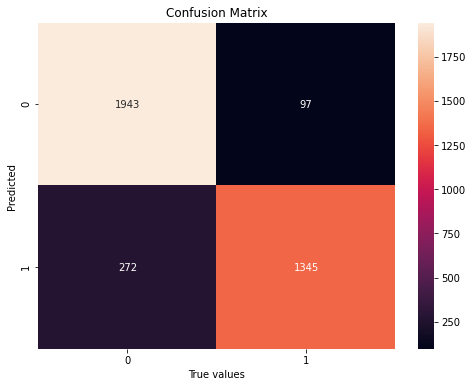

In [38]:
plt.figure(figsize=(8,6))
data= confusion_matrix(y_test,prediction)
sns.heatmap(data, fmt='d', annot=True)
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

### Multinomial Classifier with Hyperparameter

In [39]:
## Multinomial Classifier with Hyperparameter
classifier= MultinomialNB(alpha=0.1)

In [45]:
for i in np.arange(0,1,0.1):
  classifier= MultinomialNB(alpha=i)
  classifier.fit(X_train,y_train)
  y_pred= classifier.predict(x_test)
  score= accuracy_score(y_test,y_pred)
  print('alpha: {} ,accuracy_score:{}'.format(i,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


alpha: 0.0 ,accuracy_score:0.9012852064533771
alpha: 0.1 ,accuracy_score:0.9010117582718075
alpha: 0.2 ,accuracy_score:0.9012852064533771
alpha: 0.30000000000000004 ,accuracy_score:0.9010117582718075
alpha: 0.4 ,accuracy_score:0.9015586546349467
alpha: 0.5 ,accuracy_score:0.9012852064533771
alpha: 0.6000000000000001 ,accuracy_score:0.9001914137270988
alpha: 0.7000000000000001 ,accuracy_score:0.8999179655455292
alpha: 0.8 ,accuracy_score:0.8999179655455292
alpha: 0.9 ,accuracy_score:0.89937106918239


In [46]:
## for alpha = 0.4 we get best accuracy